# Project: Investigate a Dataset (TMDb movie data)

> By: Fady Morris Ebeid

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a>
    <ul>
        <li><a href="#intro-1">Dataset Description</a></li>
        <li><a href="#intro-2">Dataset issues</a></li>
        <li><a href="#intro-3">Explored questions</a></li>
    </ul>
    </li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
  <li><a href="#wrangling-1">General Properties</a></li>
  <ul>
    <li><a href="#wrangling-1-1">Summary Statistics</a></li>
    <li><a href="#wrangling-1-2">Missing Values</a></li>
    <li><a href="#wrangling-1-3">Summary of Dataset Issues</a></li>
  </ul>
  <li><a href="#wrangling-2">Data Cleaning</a></li>
  <ul>
    <li><a href="#wrangling-2-1">Cleaning Genre Null Values for Question 1</a></li>
    <li><a href="#wrangling-2-2">Cleaning zero revenue rows for Question 2 and 3</a></li>
  </ul>
</ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#q1">Research Question 1 : Which genres are most popular from year to year?</a></li>
    <li><a href="#q2">Research Question 2 : Is there a correlation between movie popularity and revenue?</a></li>
    <li><a href="#q3">Research Question 3 : Is there a correlation between movie vote average and revenue?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<a id='intro-1'></a>
### Dataset Description:
This dataset contains information about 10,000 movies collected from **The Movie Database (TMDb)**, including user ratings and revenue.

A clean version of the dataset can be downloaded from [this link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). (cleaned from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata))

The final two columns ending with `“_adj”` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

<a id='intro-2'></a>
### Dataset issues:
Certain columns, like `‘cast’` and `‘genres’`, contain multiple values separated by pipe `(|)` characters.
There are some odd characters in the `‘cast’` column. 

<a id='intro-3'></a>
### Explored questions:
In this report we will find an answer to the following two research questions:  

<ul>
<li><a href="#q1">Which genres are most popular from year to year?</a></li>
<li><a href="#q2">Is there a correlation between movie popularity and revenue?</a></li>
<li><a href="#q3">Is there a correlation between movie vote average and revenue?</a></li>
</ul>


In [1]:
# set up import statements

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import statsmodels.api as sm #for linear regression

In [3]:
# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [4]:
# enable seaborn
sns.set()

<a id='wrangling'></a>
## Data Wrangling

<a id='wrangling-1'></a>
### General Properties

In [5]:
# Load your data and print out a few lines.
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv') #pd.read_csv('../data/tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**The dataset has many columns, from which the following are the important to our analysis:**
- `id`: unique identifier of the movie.
- `popularity`: [Reference](https://developers.themoviedb.org/3/getting-started/popularity)
- `genres` : Movie genres.
- `release_year`: Movie release year.
- `budget_adj`: The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
- `revenue_adj`: The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [6]:
df.shape

(10866, 21)

We have 21 features and 10866 entries in the dataset

<a id='wrangling-1-1'></a>
#### Summary Statistics

Displaying Summary Statistics

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It is apparent that there are many zero entries for the `revenue` column as it is shown in `mean`, `25%` and `50%` statistics. We should clean them to get proper results for <a href="#q2">Research Question 2</a>

Next we check the columns of the dataset and their datatypes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The datatypes of the dataset columns seem to be correct. The column names are in good shape, all of them are lowercase without spaces.

The following columns are not needed in our analysis.  
`imdb_id`, `budget`, `revenue`, `original_title`,`cast`, `homepage`,
 `director`, `tagline`, `keywords`, `overview`, `runtime`, `production_companies`,
 `release_date`,`vote_count`
 
 They are irrelevant for our analysis. So, we can safely drop them.

In [9]:
df.drop(['imdb_id', 'budget', 'revenue', 'original_title','cast', 'homepage',
         'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies',
         'release_date','vote_count'],axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   genres        10843 non-null  object 
 3   vote_average  10866 non-null  float64
 4   release_year  10866 non-null  int64  
 5   budget_adj    10866 non-null  float64
 6   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 594.4+ KB


<a id='wrangling-1-2'></a>
#### Missing Values

Check for null values

In [11]:
df.isnull().sum()

id               0
popularity       0
genres          23
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

As we can see there are 23 rows with missing `genre` values.  
To get rows with missing data:

In [12]:
df[df.isnull().any(axis=1)]

,id,popularity,genres,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,NaN,6.1,2015,0.00000,0.0
620,361043,0.129696,NaN,5.0,2015,0.00000,0.0
997,287663,0.330431,NaN,6.8,2014,0.00000,0.0
1712,21634,0.302095,NaN,7.4,2009,0.00000,0.0
1897,40534,0.020701,NaN,7.0,2009,0.00000,0.0
2370,127717,0.081892,NaN,5.8,2010,0.00000,0.0
2376,315620,0.068411,NaN,7.7,2010,0.00000,0.0
2853,57892,0.130018,NaN,7.2,2001,0.00000,0.0
3279,54330,0.145331,NaN,6.1,2008,0.00000,0.0
4547,123024,0.520520,NaN,8.3,2012,0.00000,0.0


Plotting a histogram of the features

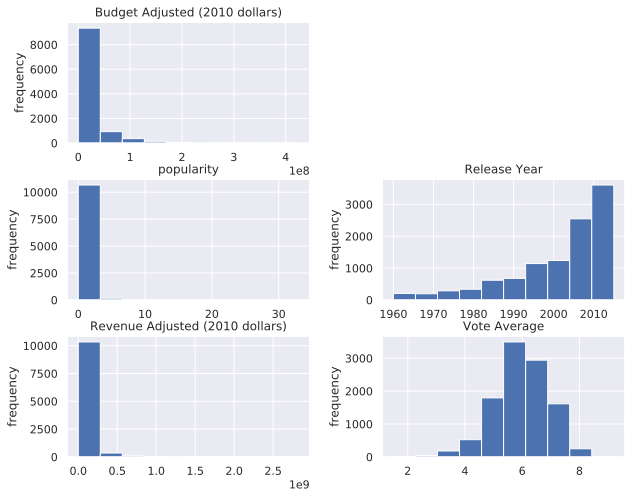

In [13]:
ax = df.hist(figsize=(10,8));
ax[0,0].set_title('Budget Adjusted (2010 dollars)');
ax[0,0].set_ylabel('frequency');
ax[0,1].remove();

ax[1,0].set_ylabel('frequency');

ax[1,1].set_title('Release Year');
ax[1,1].set_ylabel('frequency');

ax[2,0].set_title('Revenue Adjusted (2010 dollars)');
ax[2,0].set_ylabel('frequency');

ax[2,1].set_title('Vote Average');
ax[2,1].set_ylabel('frequency');

Next we count the number of rows with missing `revenue_adj` values, which are equal to zero.

In [14]:
n_zero_revenue = df.query('revenue_adj == 0').shape[0]
print(
    "Number of rows with missing revenue values:", n_zero_revenue,
    f"\nPercentage of rows with missing revenue values: {n_zero_revenue / df.shape[0]:0.2f}%"
)

Number of rows with missing revenue values: 6016 
Percentage of rows with missing revenue values: 0.55%


The percentage of rows with misssing revenue values is very large. This will limit our analysis of relationship between popularity, vote average and revenue.

We can see from the histogram that:
- `release_year`: More movies are released in later years.
- `popularity`: The data is skewed to the left.
- `budget_adj`: The data is skewed to the left.
- `revenue_adj` The data is skewed to the left.

<a id='wrangling-1-3'></a>
#### Summary of Dataset Issues 

Summary of the issues with the data that were found in this section:
- Missing genre values
- zero revenue values

<a id='wrangling-2'></a>
### Data Cleaning

Rows of the dataset that contain zero or missing values are a large portion of the dataset. So, we create separate copies of the dataset for each research question with those rows removed.

<a id='wrangling-2-1'></a>
#### Cleaning Genre Null Values for Question 1

As we can see from the previous section, `genres` have 23 rows with null values. We create a mask that is used to exclude such rows.

In [15]:
nullgenres = df.genres.isnull().to_numpy()

We can also create a dataset without such rows

In [16]:
df_q1 = df.dropna()

In [17]:
df_q1.isnull().sum()

id              0
popularity      0
genres          0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

<a id='wrangling-2-2'></a>
#### Cleaning zero revenue rows for Question 2 and 3

In the following cells we extract rows with revenue of non-zero, as zero values will affect our analysis.

In [18]:
df_q2 = df.query('revenue_adj > 0')

In [19]:
df_q2.shape

(4850, 7)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1 : Which genres are most popular from year to year?

In the following code cell, we separate `genres`, `id`, `release_year` and `popularity` in a separate dataset. We also split the `genres` multiple entries using `|` as a delimiter, with each genre in a new row.

In [20]:
df_genres = pd.DataFrame(data=df_q1.genres.str.split('|').tolist(), index=[df_q1.id,df_q1.release_year,df_q1.popularity]).stack()

df_genres = df_genres.reset_index([0,1,2])
df_genres.rename(mapper={0:'genres'},axis=1,inplace=True)
df_genres

,id,release_year,popularity,genres
0,135397,2015,32.985763,Action
1,135397,2015,32.985763,Adventure
2,135397,2015,32.985763,Science Fiction
3,135397,2015,32.985763,Thriller
0,76341,2015,28.419936,Action
...,...,...,...,...
0,39768,1966,0.065141,Mystery
1,39768,1966,0.065141,Comedy
0,21449,1966,0.064317,Action
1,21449,1966,0.064317,Comedy


Count the number of unique genres and create a plot for all genres from 1960 to 2010

We have 20 genres


,genres,frequencies
0,Drama,4761
1,Comedy,3793
2,Thriller,2908
3,Action,2385
4,Romance,1712
5,Horror,1637
6,Adventure,1471
7,Crime,1355
8,Family,1231
9,Science Fiction,1230


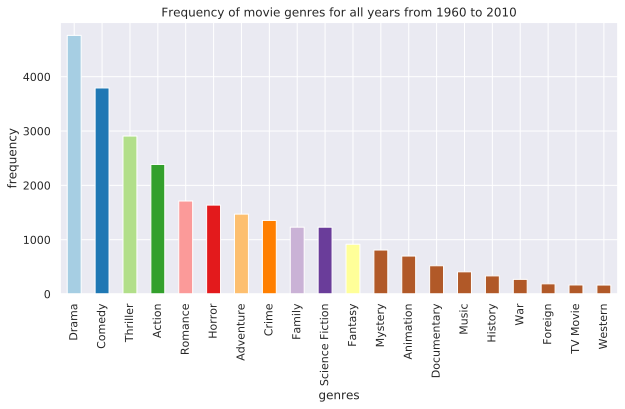

In [21]:
n_genres = df_genres.genres.nunique()

print(f"We have {n_genres} genres");
df_genres_freqs = df_genres.genres.value_counts()\
.reset_index(0)\
.rename(columns={'index': 'genres', 'genres': 'frequencies'})
display(df_genres_freqs)

ax = df_genres_freqs.plot('genres', 'frequencies',
                     kind='bar',
                     figsize=(10,5),
                     legend=False,
                     color=plt.cm.Paired(np.arange(n_genres)),
                     title='Frequency of movie genres for all years from 1960 to 2010',
                    );

ax.set_ylabel('frequency');

From the plot we can see that `Drama` and `Comedy` are the most freqent two genres.

Next we display the most popular genre from year to year, according to genre mean popularity.

In [22]:
df_top_genre_year =\
df_genres\
.groupby(['release_year', 'genres']).agg({'popularity':np.mean})\
.groupby(['release_year'], group_keys=False)\
.apply(lambda x: x.sort_values('popularity', ascending=False).head(1))\

df_top_genre_year.reset_index([0,1], inplace=True)

df_top_genre_year.head(50)

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.585717
7,1967,Animation,1.348805
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


Then we count the number of occurrences where each genre topped the charts for every year:

,genres,years_frequency
0,Adventure,14
1,Animation,10
2,Fantasy,8
3,Crime,5
4,Action,3
5,Family,3
6,War,3
7,Music,2
8,Mystery,2
9,Science Fiction,2


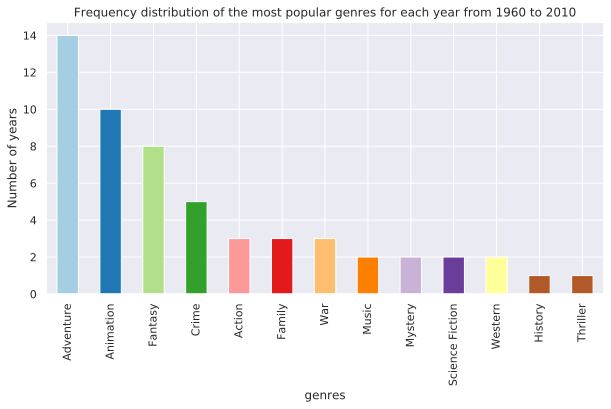

In [23]:
genre_top_freqs =\
df_top_genre_year\
.groupby('genres')\
.agg({'release_year':pd.Series.count})\
.sort_values('release_year', ascending=False)

genre_top_freqs.rename(columns = {'release_year':'years_frequency'}, inplace = True) 

genre_top_freqs.reset_index(0, inplace=True)

display(genre_top_freqs)

ax = genre_top_freqs.plot('genres', 'years_frequency',
                     kind='bar',
                     figsize=(10,5),
                     legend=False,
                     title='Frequency distribution of the most popular genres for each year from 1960 to 2010',
                     color=plt.cm.Paired(np.arange(len(genre_top_freqs)))
                    );
ax.set_ylabel('Number of years');

From the plot we can see that `Adventure`, `Animation` and `Fantasy` are the most popular three genres for every year

<a id='q2'></a>
### Research Question 2  : Is there a correlation between movie popularity and revenue?

In [24]:
df_q2

,id,popularity,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...
10822,396,0.670274,Drama,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,Mystery|Thriller,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,Action|Western,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,Action|Adventure|Drama|War|Romance,7.0,1966,8.061618e+07,1.343603e+08


correlation : (0.6090834322818585, 0.0)


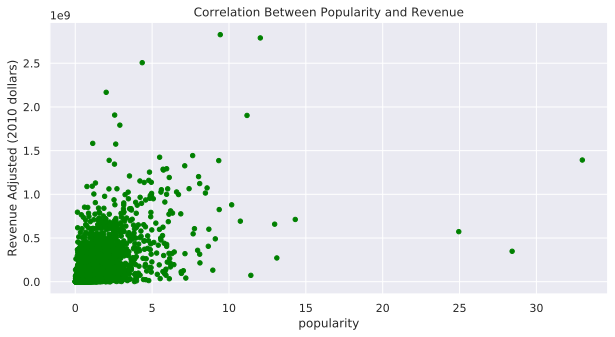

In [25]:
ax = df_q2.plot.scatter(
    'popularity',
    'revenue_adj',
    c='green',
    title = 'Correlation Between Popularity and Revenue',
    figsize=(10,5)
    );

ax.set_ylabel('Revenue Adjusted (2010 dollars)');
print("correlation :", scipy.stats.pearsonr(df.popularity, df.revenue_adj))

A correlation coefficient of 0.609 indicate a **moderate** correlation between popularity and revenue.

To improve the plot visibility we can remove outliers from the plot

correlation : (0.6090834322818585, 0.0)


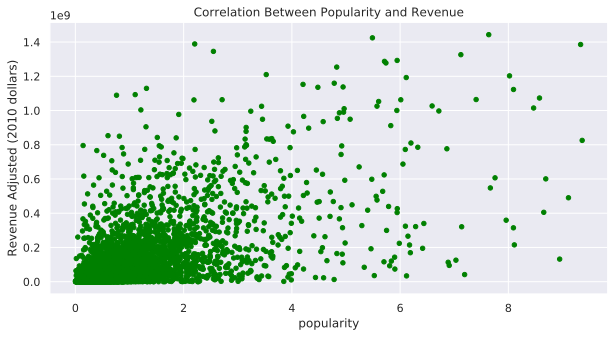

In [26]:
#df_q2.query('popularity < 10 & revenue_adj < 1.5e9').plot.scatter('popularity', 'revenue_adj',c='green');

ax = df_q2.query('popularity < 10 & revenue_adj < 1.5e9').plot.scatter(
    'popularity',
    'revenue_adj',
    c='green',
    title = 'Correlation Between Popularity and Revenue',
    figsize=(10,5)
    );

ax.set_ylabel('Revenue Adjusted (2010 dollars)');
print("correlation :", scipy.stats.pearsonr(df.popularity, df.revenue_adj))

<a id='q3'></a>
### Research Question 3  : Is there a correlation between movie vote average and revenue?

correlation : (0.1930850948330119, 9.21692126148123e-92)


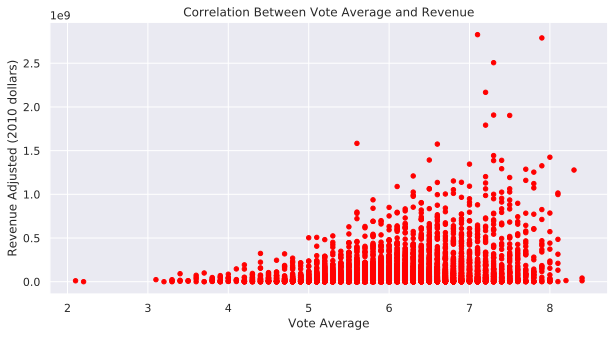

In [27]:
#df_q2.plot.scatter('vote_average', 'revenue_adj',c='blue');

ax = df_q2.plot.scatter(
    'vote_average',
    'revenue_adj',
    c='red',
    title = 'Correlation Between Vote Average and Revenue',
    figsize=(10,5)
    );

ax.set_xlabel('Vote Average');
ax.set_ylabel('Revenue Adjusted (2010 dollars)');

print("correlation :", scipy.stats.pearsonr(df.vote_average, df.revenue_adj))

A correlation coefficient of 0.19 indicate a **none or very weak** correlation between popularity and revenue.

<a id='conclusions'></a>
## Conclusions

The dataset contains the data of 10866 movies. Altough this number is good for a movie database and can represent the whole population, the dataset has some limitations:
- It has some movies that have missing genres (23 rows of 10866) but it was easily neglecgted and such a small number didn't affect our analysis of popularity of genres much.
- It has large count of rows with missing (zero) revenue values (6016 of 10866), which is a large percentage for such a dataset (55%). Such large percentage of missing values affects the analysis of the relationship between popularity and revenue, and voting average and revenue.


The popularity of gernes from year to year was analyzied by calculating the mean of popularity for each genre for years from 1960 to 2010. It was found that the three genres `Adventure`, `Animation` and `Fantasy` were the most popular three genres for all the years.


To measure the relationship between revenue and both popularity and voting average the pearson correlation test was used.
The correlation test was made betwen popularity and revenue and was found to be 0.60 indicating a moderate correlation. It was also tested for the relationship between voting average and revenue and was measured 0.19 indicating weak or non-existent correlation.
